# Lab 6-2: Bayes' Theorem Example: River Pollution

## Problem

A community environmental justice coalition, dedicated to promoting the health of an urban river, its ecosystem, and the wellbeing of the people that live along it, conducts regular water quality sampling.

One pollutant of concern, “Chemical X,” is known to be a byproduct produced by three companies (A, B, and C) located along the river. These companies are required by law to securely store hazardous waste byproducts containing X.

* “Company A” has 30% of the total hazardous waste containing X, and stores it in above-ground barrels with a known containment failure probability of 0.3%.
* “Company B” has 10% of the hazardous waste and stores it in underground tanks with a known failure probability of 0.7%.
* “Company C” has 60% of the hazardous waste and buries it capped with impermeable layers, but this method has a known failure rate of 0.5%.

Based on the above information, answer the following:

1) The community coalition detected X in their latest water samples from the river, and they want to know based on the information above (and using Bayes' Theorem) what is the probability that the pollutant came from each company, given that they detected X.
2) Which company is the likely source of the pollutant after X is detected on 3 separate occasions? 
2) Which company is the likely source of the pollutant after X is detected on 6 separate occasions?

And to clarify some assumptions:
* We can assume that our first prior probabilities are proportional to the amount of hazardous waste each company has stored. 
* For each subsequent occurance of X being detected, we will update our prior probabilities with the posterior probabilities from the previous occurance.
* And we are assuming that only one company has hazardous waste leaking into the river across all occurances.


---

## Solution

First, write out the information we know in terms of probabilities:

We are told to assume that the first prior probabilities are proportional to the amount of hazardous waste stored by each company, therefore:

$P(A) = 0.3$

$P(B) = 0.1$

$P(C) = 0.6$

We are also told that each company's method of storing hazardous waste has a known failure rate, therefore we can say that the probability of X leaking into the river given that it came from each company is equal to these known failure rates:

$P(X|A) = 0.003$

$P(X|B) = 0.007$

$P(X|C) = 0.005$

The final piece of information that we need, is the total probability that X will be polluting the river. This is the sum of the probabilities that hazardous waste is leaked by each company:

$P(X) = P(X|A)P(A) + P(X|C)P(C) + P(X|C)P(C)$

Now, we can solve the questions using Bayes' Theorem to determine the probability that X came from each company given that we detected X. When we have repeated observations of X in the river, we will update the prior probabilities each time from the result of the previous calculation.

$P(A|X) = \frac{P(X|A)P(A)}{P(X)}$

$P(B|X) = \frac{P(X|B)P(B)}{P(X)}$

$P(C|X) = \frac{P(X|C)P(C)}{P(X)}$

---

Now we can do our computations to anwer each question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # We will use matplotlib to plot the results later

### 1) The community coalition detected X in their latest water samples from the river, and they want to know based on the information above (and using Bayes' Theorem) what is the probability that the pollutant came from each company, given that they detected X.

In [2]:
# probability that anything comes from companies A, B, or C, is proportional to their percent of total hazardous waste storage
P_A = 0.3
P_B = 0.1
P_C = 0.6

# probability that hazardous waste containment fails and runs off into river
P_X_A = 0.003
P_X_B = 0.007
P_X_C = 0.005

# total probability of X
P_X = (P_X_A * P_A) + (P_X_B * P_B) + (P_X_C * P_C)
print(f'P(X) = {P_X}')

# bayes theorem, what's the probability that contaminant we measure (X) came from each company's hazardous waste storage?
print(f'P(X|A)P(A) = {(P_X_A * P_A)}')
P_A_X = (P_X_A * P_A) / P_X

print(f'P(X|A)P(A) = {(P_X_B * P_B)}')
P_B_X = (P_X_B * P_B) / P_X

print(f'P(X|C)P(C) = {(P_X_C * P_C)}')
P_C_X = (P_X_C * P_C) / P_X

print(f'P(A|X) = {P_A_X}')
print(f'P(B|X) = {P_B_X}')
print(f'P(C|X) = {P_C_X}')

P(X) = 0.0046
P(X|A)P(A) = 0.0009
P(X|A)P(A) = 0.0007000000000000001
P(X|C)P(C) = 0.003
P(A|X) = 0.1956521739130435
P(B|X) = 0.1521739130434783
P(C|X) = 0.6521739130434783


#### Answer:

The probability that the pollutant detected came from Company A is 19.6%, from Company B is 15.2%, and from Company C is 65.2%


Company C is the most likely source of the pollution, followed by Company A.

---

### 2) Which company is the likely source of the pollutant after X is detected on 3 separate occasions?

To answer this question, I am going to write a function that computes Bayes' theorem for this example problem. By writing a function that does this, I can more easily re-run the same code to compute the results after X was detected multiple times. The inputs to this function will be the prior probabilities (represented by $P(A)$, $P(B)$, and $P(C)$) and the likelihoods of pollutant leaking into the river for each company ($P(X|A)$, $P(X|B)$, and $P(X|C)$). The function will then output the posterior probabilities that the pollution we detected came from each company's hazardous waste storage site ($P(A|X)$, $P(B|X)$, and $P(C|X)$).

In [3]:
def bayes_example(P_A, P_B, P_C, P_X_A, P_X_B, P_X_C):

    # total probability of X
    P_X = (P_X_A * P_A) + (P_X_B * P_B) + (P_X_C * P_C)

    # bayes theorem, what's the probability that contaminant we measure (X) came from each company's hazardous waste storage?
    P_A_X = (P_X_A * P_A) / P_X
    P_B_X = (P_X_B * P_B) / P_X
    P_C_X = (P_X_C * P_C) / P_X

    return [P_A_X, P_B_X, P_C_X]

In [4]:
# First sample is detected (should give us the same result as in question 1 above)

# probability that anything comes from companies A, B, or C, is proportional to their percent of total hazardous waste storage
P_A = 0.3
P_B = 0.1
P_C = 0.6

# probability that hazardous waste containment fails and runs off into river
P_X_A = 0.003
P_X_B = 0.007
P_X_C = 0.005

[P_A_X_1, P_B_X_1, P_C_X_1] = bayes_example(P_A, P_B, P_C, P_X_A, P_X_B, P_X_C)
print('First sample of X is detected in the river:')
print(f'P(A|X) = {P_A_X_1}')
print(f'P(B|X) = {P_B_X_1}')
print(f'P(C|X) = {P_C_X_1}')

First sample of X is detected in the river:
P(A|X) = 0.1956521739130435
P(B|X) = 0.1521739130434783
P(C|X) = 0.6521739130434783


In [5]:
# Second sample is detected. I have replace the prior probabilities with the posterior probabilities after the first detection.
[P_A_X_2, P_B_X_2, P_C_X_2] = bayes_example(P_A_X_1, P_B_X_1, P_C_X_1, P_X_A, P_X_B, P_X_C)
print('Second sample of X is detected in the river:')
print(f'P(A|X) = {P_A_X_2}')
print(f'P(B|X) = {P_B_X_2}')
print(f'P(C|X) = {P_C_X_2}')

Second sample of X is detected in the river:
P(A|X) = 0.11946902654867256
P(B|X) = 0.21681415929203543
P(C|X) = 0.6637168141592921


In [6]:
# Third sample is detected. I have replace the prior probabilities with the posterior probabilities after the second detection.
[P_A_X_3, P_B_X_3, P_C_X_3] = bayes_example(P_A_X_2, P_B_X_2, P_C_X_2, P_X_A, P_X_B, P_X_C)
print('Third sample of X is detected in the river:')
print(f'P(A|X) = {P_A_X_3}')
print(f'P(B|X) = {P_B_X_3}')
print(f'P(C|X) = {P_C_X_3}')

Third sample of X is detected in the river:
P(A|X) = 0.06899488926746165
P(B|X) = 0.2921635434412266
P(C|X) = 0.6388415672913117


#### Answer:

After three samples of X are detected in the river, the probability that the pollution is coming from Company A is now 6.9%, from Company B is 29.2%, and from Company C is 63.9%.

Company C is still the most likely source of the pollution, but now Company B is the second-most likely source instead of Company A.

---

### 2) Which company is the likely source of the pollutant after X is detected on 6 separate occasions?

To speed up answering this question, we can put the function that we wrote above into a for loop. We will then loop through six times to compute an update for each time a sample of X was detected in the river.

In [7]:
# I am re-defining these here just to illusrate what we're doing
# We start off with the original prior probabilities:
P_A = 0.3
P_B = 0.1
P_C = 0.6

# probability that hazardous waste containment fails and runs off into river
P_X_A = 0.003
P_X_B = 0.007
P_X_C = 0.005

# create an empty array of zeros, which we will fill up with answers in the for loop
n = 6 # we have 6 times that we sampled X in the river
posteriors = np.zeros((n+1,3)) # the empty array is going to have shape 7 x 3
                               # 7 for the 6 samples plus 1 set of original prior probabilities
                               # and 3 for the 3 companies A, B, and C

# input the original prior probabilities
posteriors[0,:] = [P_A, P_B, P_C]

# now loop through 6 times, compute a new set of posterior probabilities, using the probabilities from the previous step as our priors
for i in range(n):
    posteriors[i+1,:] = bayes_example(posteriors[i,0], posteriors[i,1], posteriors[i,2], P_X_A, P_X_B, P_X_C)
    
# take a look at the results... 
# each row represents how many times X was detected in the river, 
# starting with 0 times in the top row and 6 times for the last row
print(posteriors)

[[0.3        0.1        0.6       ]
 [0.19565217 0.15217391 0.65217391]
 [0.11946903 0.21681416 0.66371681]
 [0.06899489 0.29216354 0.63884157]
 [0.03800438 0.37550829 0.58648733]
 [0.02009039 0.46318139 0.51672821]
 [0.01023944 0.5508273  0.43893326]]


#### Answer:

After X was detected in the river six times, the probability that the pollution is coming from Company A is now 1.0%, from Company B is 55.1%, and from Company C is 43.9%.

After six separate detections of X in the river, it is now most likely that the pollution is coming from Company B! And Company C is now the second-most likely source.

In other words, since we observed 6 separate events where X leaked into the river, it is most likely that the X pollution is coming from Company B, and therefore their underground tanks containing hazardous waste should be prioritized for inspection.

---

We can also plot the probabilities, and how they change with each update (each new detection of X in the river):

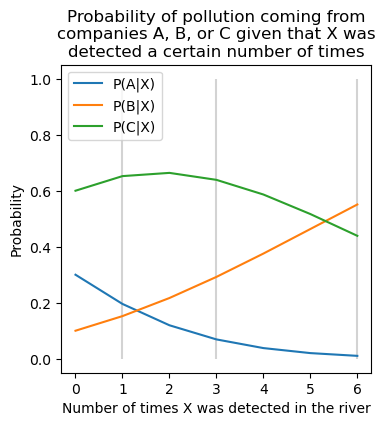

In [8]:
plt.figure(figsize=(4,4))

# plot our posteriors, these are already formatted nicely so that matplotlib will plot one line for each company
plt.plot(posteriors)

# plot vertical lines at each point at which we checked which company was most likely polluting (after 1 detection of X, 3, and 6)
plt.vlines([1,3,6],0,1, 'lightgrey', zorder=-1)

# set up the labels for the legend
plt.legend(['P(A|X)', 'P(B|X)', 'P(C|X)'],loc='upper left')

# add axes labels and title
plt.xlabel('Number of times X was detected in the river')
plt.ylabel('Probability')
plt.title('Probability of pollution coming from\ncompanies A, B, or C given that X was\ndetected a certain number of times');